In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150
import seaborn as sns

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso

In [194]:
def forward_selection(input_df, depv="y", indepv = ["x1"]):
    selected = []
    candidates = indepv.copy()

    best_adjr2 = -1
    best_subset = []

    while len(candidates) > 0:
        #print("Current Candidates: ", candidates)
        tmp_indep_subset = []
        tmp_model_adjr = []
        tmp_model_nindep = []

        for acandidate in candidates:
            tmplist = selected.copy()
            tmplist.append(acandidate)
            modelstr = depv + " ~ " + "+".join(tmplist)
            result6tmp = smf.ols(modelstr, data=input_df).fit()
            #print(df18_result6tmp.summary())
            tmp_indep_subset.append(tmplist)
            tmp_model_adjr.append(result6tmp.rsquared_adj)
            tmp_model_nindep.append(len(tmplist))
        
        #find the best element
        tmp_adjr2 = np.array(tmp_model_adjr)
        tmpind = tmp_adjr2.argmax()
        this_adjr2 = tmp_adjr2[tmpind]
        selected = tmp_indep_subset[tmpind]

        if this_adjr2 <= 0:
            raise("Encounterd negative Adj R2. Stop.")
            
        #print("Current best model: ", selected)
        print(f"\rCurrent best AdjR2: {this_adjr2} / Best AdjR2: {best_adjr2}", end='')


        if this_adjr2 > best_adjr2:
            #print(" best result updated")
            best_adjr2 = this_adjr2
            best_subset = selected


        candidates = set(candidates) - set(selected)
        candidates = list(candidates)

    #print out the best result
    print("\rbest_adjr2 = ", best_adjr2)
    print("best_subset = ", best_subset)

    #run the best model again
    modelstr = depv + " ~ " + "+".join(best_subset)
    result6b = smf.ols(modelstr, data=input_df).fit()
    print(result6b.summary())

In [157]:
df = pd.read_csv('data/tracks_no_may.csv', encoding='utf-8', index_col=False)
df = df.rename(columns = {'loadness':'loudness'})
df.head()

,Unnamed: 0,id,name,genre,url,popularity,acousticness,danceability,energy,instrumentalness,...,duration_ms,key,loudness,mode,tempo,valence,available_market,release_date,explicit,idx
0,0,5OpjJ9qy54D3PzQJ1s4Q9X,TESTIFY,acoustic,https://open.spotify.com/track/5OpjJ9qy54D3PzQ...,59.0,0.471,0.495,0.710,0.000000,...,243800.0,0.0,-3.941,1.0,90.024,0.319,79.0,2016-07-15,0.0,0
1,1,6ZgaHk6yrHBbHrbTmKl2pZ,Learned A Lot,acoustic,https://open.spotify.com/track/6ZgaHk6yrHBbHrb...,39.0,0.850,0.556,0.285,0.068000,...,270786.0,0.0,-9.884,1.0,128.167,0.322,78.0,2011,0.0,1
2,2,4wQKyYfNDY7E8ybcp0hF61,Jupiter's Call,acoustic,https://open.spotify.com/track/4wQKyYfNDY7E8yb...,35.0,0.879,0.694,0.354,0.000083,...,180952.0,2.0,-12.275,1.0,130.346,0.652,79.0,2018-06-01,0.0,2
3,3,3JndPOkXLuhupgWnRrPSua,Rain,acoustic,https://open.spotify.com/track/3JndPOkXLuhupgW...,36.0,0.654,0.497,0.372,0.000000,...,248293.0,5.0,-8.094,1.0,94.604,0.290,56.0,2002-04-09,0.0,3
4,4,3tjQYh1H3c17IQMdd8AIBb,The Shining Barrier,acoustic,https://open.spotify.com/track/3tjQYh1H3c17IQM...,40.0,0.794,0.373,0.160,0.764000,...,251075.0,10.0,-21.342,1.0,112.578,0.144,79.0,2014-09-15,0.0,4


In [188]:
cato = ['j-pop', 'k-pop', 'hip-hop', 'country', 'dance', 'jazz', 'pop', 'blues']
df = df.iloc[[g in cato for g in df['genre']],:]

C:\Users\ray\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


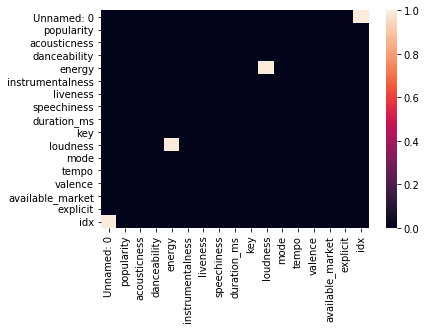

In [198]:
corr = np.sort(np.abs(df.corr()).values.reshape(-1))
sns.heatmap((np.abs(df.corr()) >= .75) * (np.abs(df.corr()) < 1))

#### remove energy

## Turn key into one hot

In [191]:
one_hot = pd.get_dummies(df['key'], prefix = 'key_')
df_key = pd.concat([df,one_hot],axis=1)
df_key.head()

,Unnamed: 0,id,name,genre,url,popularity,acousticness,danceability,energy,instrumentalness,...,key__2.0,key__3.0,key__4.0,key__5.0,key__6.0,key__7.0,key__8.0,key__9.0,key__10.0,key__11.0
757,778,36KStm44i8gAqnQkm3PY9c,Undecided,blues,https://open.spotify.com/track/36KStm44i8gAqnQ...,52.0,0.88900,0.701,0.296,0.000002,...,0,0,1,0,0,0,0,0,0,0
758,779,7cy1bEJV6FCtDaYpsk8aG6,China Grove,blues,https://open.spotify.com/track/7cy1bEJV6FCtDaY...,68.0,0.31900,0.623,0.910,0.000448,...,0,0,0,0,0,0,0,1,0,0
759,780,0l4mKN097GpgeBGaoVQ1wh,Let Go Of Your Plans,blues,https://open.spotify.com/track/0l4mKN097GpgeBG...,44.0,0.02570,0.459,0.494,0.000000,...,0,0,0,0,0,0,0,0,0,1
760,781,3VyJPsb2ucaaVptLSDpJNH,I Love You,blues,https://open.spotify.com/track/3VyJPsb2ucaaVpt...,51.0,0.60800,0.559,0.446,0.000131,...,0,0,0,0,0,0,0,0,1,0
761,782,5aYVqxyetmT5OYmvZCA90X,Slow Ride,blues,https://open.spotify.com/track/5aYVqxyetmT5OYm...,56.0,0.00608,0.449,0.642,0.007070,...,1,0,0,0,0,0,0,0,0,0


In [192]:
remove = ['Unnamed: 0', 'release_date', 'genre', 'id', 'url', 'idx', 'popularity', 'name', 'key', 'energy']
indepv = list(df_key.columns)
for feature in remove :
    indepv.remove(feature)
indepv = [f'Q("{v}")' for v in indepv]

In [195]:
forward_selection(df_key, "popularity", indepv)

best_adjr2 =  0.24787578271166577
best_subset =  ['Q("explicit")', 'Q("loudness")', 'Q("danceability")', 'Q("available_market")', 'Q("duration_ms")', 'Q("valence")', 'Q("instrumentalness")', 'Q("speechiness")', 'Q("mode")', 'Q("acousticness")', 'Q("key__8.0")', 'Q("key__0.0")', 'Q("key__10.0")', 'Q("key__2.0")']
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     18.23
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           4.06e-39
Time:                        15:27:05   Log-Likelihood:                -2677.3
No. Observations:                 733   AIC:                             5385.
Df Residuals:                     718   BIC:                             5454.
Df Model:                          14                 

## Turn genere into one hot

In [201]:
one_hot = pd.get_dummies(df_key['genre'], prefix='genre_')
df_genre = pd.concat([df_key, one_hot[:]], axis=1)
df_genre.head()

,Unnamed: 0,id,name,genre,url,popularity,acousticness,danceability,energy,instrumentalness,...,key__10.0,key__11.0,genre__blues,genre__country,genre__dance,genre__hip-hop,genre__j-pop,genre__jazz,genre__k-pop,genre__pop
757,778,36KStm44i8gAqnQkm3PY9c,Undecided,blues,https://open.spotify.com/track/36KStm44i8gAqnQ...,52.0,0.88900,0.701,0.296,0.000002,...,0,0,1,0,0,0,0,0,0,0
758,779,7cy1bEJV6FCtDaYpsk8aG6,China Grove,blues,https://open.spotify.com/track/7cy1bEJV6FCtDaY...,68.0,0.31900,0.623,0.910,0.000448,...,0,0,1,0,0,0,0,0,0,0
759,780,0l4mKN097GpgeBGaoVQ1wh,Let Go Of Your Plans,blues,https://open.spotify.com/track/0l4mKN097GpgeBG...,44.0,0.02570,0.459,0.494,0.000000,...,0,1,1,0,0,0,0,0,0,0
760,781,3VyJPsb2ucaaVptLSDpJNH,I Love You,blues,https://open.spotify.com/track/3VyJPsb2ucaaVpt...,51.0,0.60800,0.559,0.446,0.000131,...,1,0,1,0,0,0,0,0,0,0
761,782,5aYVqxyetmT5OYmvZCA90X,Slow Ride,blues,https://open.spotify.com/track/5aYVqxyetmT5OYm...,56.0,0.00608,0.449,0.642,0.007070,...,0,0,1,0,0,0,0,0,0,0


In [202]:
remove = ['Unnamed: 0', 'release_date', 'genre', 'id', 'url', 'idx', 'popularity', 'name', 'key', 'energy']
indepv = list(df_genre.columns)
for feature in remove :
    indepv.remove(feature)
indepv = [f'Q("{v}")' for v in indepv]

In [203]:
forward_selection(df_genre, "popularity", indepv)

best_adjr2 =  0.6870253246036999
best_subset =  ['Q("genre__pop")', 'Q("genre__dance")', 'Q("genre__hip-hop")', 'Q("genre__country")', 'Q("genre__k-pop")', 'Q("available_market")', 'Q("genre__j-pop")', 'Q("instrumentalness")', 'Q("key__6.0")', 'Q("key__5.0")', 'Q("speechiness")', 'Q("danceability")', 'Q("key__11.0")', 'Q("liveness")', 'Q("key__7.0")']
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 22 Jun 2020   Prob (F-statistic):          1.77e-172
Time:                        15:30:25   Log-Likelihood:                -2355.4
No. Observations:                 733   AIC:                             4743.
Df Residuals:                     717   BIC:                             4816.
Df Model:     

## Add intersection

In [251]:
gen_col = ['genre__blues', 'genre__country', 'genre__dance', 'genre__hip-hop', 'genre__j-pop', 'genre__jazz', 'genre__k-pop', 'genre__pop']
remove = ['Unnamed: 0', 'release_date', 'genre', 'id', 'url', 'idx', 'popularity', 'name', 'key', 'energy']
col = [c for c in df_genre.columns if c not in gen_col and c not in remove]

df_inter = df_genre.copy()
df_inter = df_inter.reset_index()
for g in gen_col:
    inter = pd.DataFrame(df_genre[col].values * df_genre[g].values.reshape(-1,1), columns=[c+'_'+g  for c in col])
    new_col = np.hstack([np.array(df_inter.columns), np.array(inter.columns)])
    df_inter = pd.concat([df_inter, inter], ignore_index=True, axis=1)
    df_inter.columns = new_col
del df_inter['index']
df_inter.head()

,Unnamed: 0,id,name,genre,url,popularity,acousticness,danceability,energy,instrumentalness,...,key__2.0_genre__pop,key__3.0_genre__pop,key__4.0_genre__pop,key__5.0_genre__pop,key__6.0_genre__pop,key__7.0_genre__pop,key__8.0_genre__pop,key__9.0_genre__pop,key__10.0_genre__pop,key__11.0_genre__pop
0,778,36KStm44i8gAqnQkm3PY9c,Undecided,blues,https://open.spotify.com/track/36KStm44i8gAqnQ...,52.0,0.88900,0.701,0.296,0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,779,7cy1bEJV6FCtDaYpsk8aG6,China Grove,blues,https://open.spotify.com/track/7cy1bEJV6FCtDaY...,68.0,0.31900,0.623,0.910,0.000448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,780,0l4mKN097GpgeBGaoVQ1wh,Let Go Of Your Plans,blues,https://open.spotify.com/track/0l4mKN097GpgeBG...,44.0,0.02570,0.459,0.494,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,781,3VyJPsb2ucaaVptLSDpJNH,I Love You,blues,https://open.spotify.com/track/3VyJPsb2ucaaVpt...,51.0,0.60800,0.559,0.446,0.000131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,782,5aYVqxyetmT5OYmvZCA90X,Slow Ride,blues,https://open.spotify.com/track/5aYVqxyetmT5OYm...,56.0,0.00608,0.449,0.642,0.007070,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [253]:
remove = ['Unnamed: 0', 'release_date', 'genre', 'id', 'url', 'idx', 'popularity', 'name', 'key', 'energy']
indepv = list(df_inter.columns)
for feature in remove :
    indepv.remove(feature)
indepv = [f'Q("{v}")' for v in indepv]

In [254]:
forward_selection(df_inter, "popularity", indepv)

best_adjr2 =  0.7268081867192906
best_subset =  ['Q("genre__pop")', 'Q("genre__dance")', 'Q("available_market_genre__hip-hop")', 'Q("danceability_genre__country")', 'Q("duration_ms_genre__k-pop")', 'Q("available_market")', 'Q("genre__hip-hop")', 'Q("duration_ms_genre__j-pop")', 'Q("key__2.0_genre__j-pop")', 'Q("key__7.0_genre__hip-hop")', 'Q("valence_genre__country")', 'Q("key__8.0_genre__j-pop")', 'Q("key__6.0_genre__dance")', 'Q("key__4.0_genre__dance")', 'Q("key__7.0_genre__blues")', 'Q("key__7.0")', 'Q("instrumentalness")', 'Q("key__5.0_genre__country")', 'Q("valence_genre__k-pop")', 'Q("acousticness_genre__k-pop")', 'Q("explicit_genre__jazz")', 'Q("liveness_genre__hip-hop")', 'Q("acousticness_genre__blues")', 'Q("mode_genre__blues")', 'Q("key__10.0_genre__k-pop")', 'Q("key__5.0_genre__hip-hop")', 'Q("key__4.0_genre__j-pop")', 'Q("danceability_genre__pop")', 'Q("speechiness")', 'Q("key__9.0_genre__k-pop")', 'Q("available_market_genre__country")', 'Q("duration_ms_genre__country")', 